
Training the ANN model for B2B cybersecurity detection...
Train on 4000 samples, validate on 1000 samples
Epoch 1/15
4000/4000 [==============================] - 0s 42us/sample - loss: 47.0214 - acc: 0.7797 - val_loss: 6.2488 - val_acc: 0.9200
Epoch 2/15
4000/4000 [==============================] - 0s 25us/sample - loss: 10.0048 - acc: 0.8140 - val_loss: 3.0267 - val_acc: 0.9200
Epoch 3/15
4000/4000 [==============================] - 0s 17us/sample - loss: 5.7926 - acc: 0.8190 - val_loss: 1.1675 - val_acc: 0.9150
Epoch 4/15
4000/4000 [==============================] - 0s 17us/sample - loss: 2.9769 - acc: 0.8217 - val_loss: 0.4857 - val_acc: 0.8620
Epoch 5/15
4000/4000 [==============================] - 0s 25us/sample - loss: 1.3067 - acc: 0.8372 - val_loss: 0.3723 - val_acc: 0.9170
Epoch 6/15
4000/4000 [==============================] - 0s 22us/sample - loss: 0.8395 - acc: 0.8670 - val_loss: 0.3765 - val_acc: 0.9210
Epoch 7/15
4000/4000 [==============================] - 0s 23us/sampl

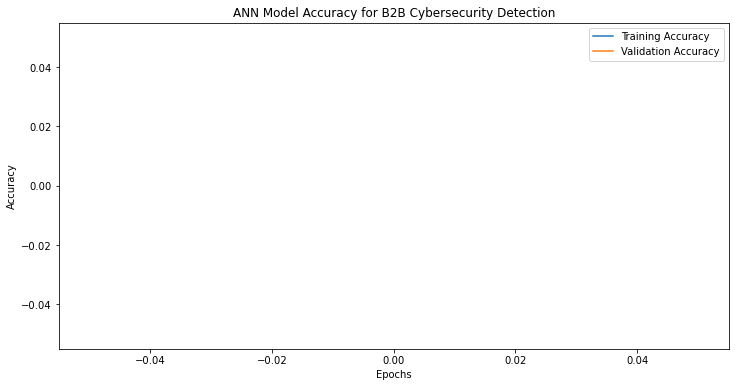

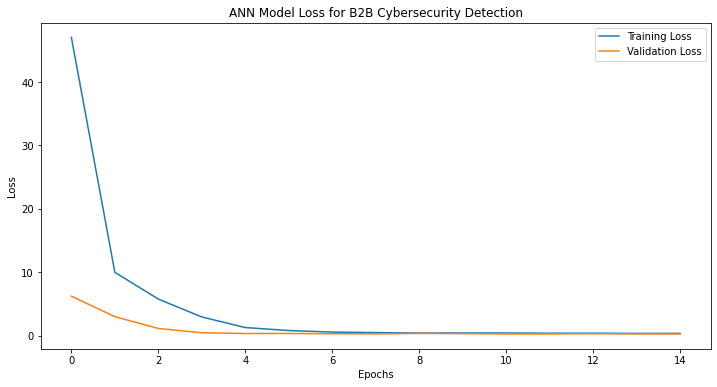


Predicted Label: legitimate, Confidence: 0.88

Model saved as 'b2b_cybersecurity_model.h5'


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Simulate B2B Transaction Dataset
np.random.seed(42)

n_samples = 5000
n_features = 15  # Features: transaction amount, frequency, time, etc.

# Simulating B2B transaction features
X = np.random.rand(n_samples, n_features) * 1000  # Transaction features scaled
y = np.random.choice(['legitimate', 'fraudulent'], size=n_samples, p=[0.9, 0.1])  # Imbalanced labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 0 for legitimate, 1 for fraudulent
y_encoded = to_categorical(y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 2: Build ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
print("\nTraining the ANN model for B2B cybersecurity detection...")
history = ann_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64
)

# Step 4: Evaluate the Model
print("\nEvaluating the model...")
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Step 5: Visualize Training Performance
print("Available keys in training history:", history.history.keys())  # Debugging step

plt.figure(figsize=(12, 6))
plt.plot(history.history.get('accuracy', []), label='Training Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
plt.title('ANN Model Accuracy for B2B Cybersecurity Detection')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history.get('loss', []), label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('ANN Model Loss for B2B Cybersecurity Detection')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Simulate Online Transaction Detection
def predict_transaction(transaction):
    """Predict if a B2B transaction is legitimate or fraudulent."""
    transaction = np.array(transaction).reshape(1, -1)
    prediction = ann_model.predict(transaction)
    label = label_encoder.inverse_transform([np.argmax(prediction)])
    confidence = np.max(prediction)
    return label[0], confidence

# Test with a random transaction
random_transaction = np.random.rand(n_features) * 1000
label, confidence = predict_transaction(random_transaction)
print(f"\nPredicted Label: {label}, Confidence: {confidence:.2f}")

# Step 7: Save the Model
ann_model.save('b2b_cybersecurity_model.h5')
print("\nModel saved as 'b2b_cybersecurity_model.h5'")
